In [1]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.feature_selection import VarianceThreshold , chi2 , SelectKBest

## Simple Linear Regression

#### 1. Read CSV data into pandas Dataframe object

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 2. Do necessary preprocessing

In [3]:
print("Dropping Missing Values > 10%")
print()

df_len = len(df)
mis_vals = {}

drop_cols = []
impt_cols = []

for col in df.columns:
  percent = (df[col].isnull().sum()/df_len) * 100
  if percent > 10:
    drop_cols.append(col)
  elif percent > 0:
    impt_cols.append(col)
  
  mis_vals[col] = percent

print(" Before drop : ",df.shape)
df.drop(drop_cols,axis=1,inplace=True)
print(" After  drop : ",df.shape)
print()


Dropping Missing Values > 10%

 Before drop :  (1338, 7)
 After  drop :  (1338, 7)



In [4]:
print("- Label Encode Non-Numerical features")
print()

labelencoder = LabelEncoder()

for col in df.columns:
  if df[col].dtype == "object":
    df[col] = labelencoder.fit_transform(df[col])
    print(" ",col," :\t",len(labelencoder.classes_))
print()

- Label Encode Non-Numerical features

  sex  :	 2
  smoker  :	 2
  region  :	 4



In [5]:
print("- Data Imputation via Mean")

for col in impt_cols:
  if df[col].dtype in ["int64","float64"]:
    df[col].fillna(df[col].mean(),inplace=True)

- Data Imputation via Mean


In [6]:
print("- Z-Score > 3 row Drop")

print()
print(" Before Removal:",df.shape,"rows and cols")

drop_indexes = []

for col in df.columns:
  if df[col].dtype in ["int64","float64"]:
    mean = df[col].mean()
    std  = df[col].std()

    for i in range(len(df)):
      val = df.loc[i,col]
      if( ((val-mean)/std) > 3):
        drop_indexes.append(i)

df.drop(drop_indexes,inplace=True)    
print(" After  Removal:",df.shape,"rows and cols")
print()

- Z-Score > 3 row Drop

 Before Removal: (1338, 7) rows and cols
 After  Removal: (1309, 7) rows and cols



In [7]:
df.reset_index(inplace=True)
minmax = MinMaxScaler()

for col in df.columns:
  df[col] = pd.Series(minmax.fit_transform(df[col].to_numpy().reshape(-1,1)).reshape(-1))

#### 3. Choose independent variable (X) and dependent variable (Y) from given dataset

In [8]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0.000000,0.021739,0.0,0.371847,0.00,1.0,1.000000,0.325308
1,0.000748,0.000000,1.0,0.554656,0.25,0.0,0.666667,0.012458
2,0.001496,0.217391,1.0,0.530676,0.75,0.0,0.666667,0.068673
3,0.002244,0.326087,1.0,0.210059,0.00,0.0,0.333333,0.430549
4,0.002992,0.304348,1.0,0.402367,0.00,0.0,0.333333,0.056649


In [9]:
X = df["age"]
Y = df["charges"]

#### 4. Find the bo and b1 values to get Ypredicted

In [10]:
num , den = 0 , 0 

mean_x = X.mean()
mean_y = Y.mean()

for i , x in enumerate(X):
  y = Y[i]
  num += (x-mean_x) * (y-mean_y)
  den += (x-mean_x) ** 2

b1 = num/den
b0 = mean_y - (b1 * mean_x)

print("bo : ",b0," | b1 : ",b1)

bo :  0.1353570227034943  | b1 :  0.24150032696029355


#### 5. After getting Ypred, calculate the SSE (sum of squared error)

In [11]:
pred = lambda x,b0,b1 : b0 + (b1 * x)

In [12]:
ssr = 0
sst = 0

mean_y = Y.mean()

for i,y in enumerate(Y):
  x = X[i]
  ssr += ((y - pred(x,b0,b1)) ** 2)
  sst += (y - mean_y) ** 2

print("rss : ",ssr)

rss :  69.60421153201948


#### 6. Calculate the RMSE (Root Mean Square Error) value

In [13]:
n    = len(Y)
rmse = math.sqrt(ssr/n)

print("rmse : ",rmse)

rmse :  0.23059396440205251


#### 7. Calculate the coefficient of determination (r2) r-square

In [14]:
r2 = 1 - (ssr/sst)
print("r2 : ",r2)

r2 :  0.09318556158130042


#### 8. Plot regression line along with the given data points

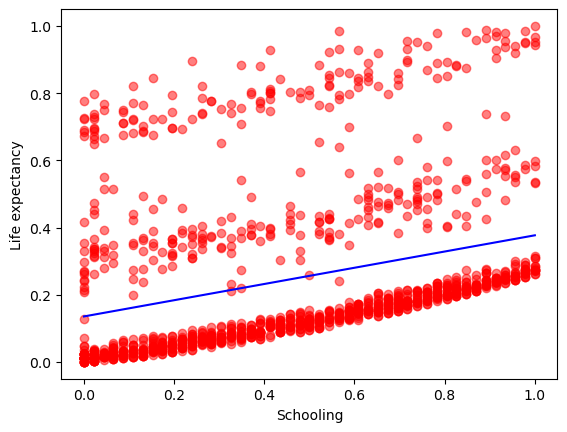

In [15]:
plt.figure()
plt.scatter(X, Y, color = 'red', alpha=0.5)

plt_y = b0 + (b1 * np.linspace(0, 1.0))
plt.plot(np.linspace(0, 1.0),plt_y, color = 'b')
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")

plt.show()

#### 9. Predict the output for a given input value

In [22]:
print("Predicted Charges :",b0 + (b1 * float(input("Enter age: "))))

Enter age:  34


Predicted Charges : 8.346368139353476
